# Análisis de CLAP score de generación de audio tasty-musicgen-small

_Análisis comparativo entre prompts originales (no musicales) y reprompts musicales detallados_

---

## Objetivo

Este notebook analiza los resultados de CLAP Score obtenidos al generar audio con el modelo **tasty-musicgen-small** (fine-tuned de musicgen-small) utilizando dos estrategias de prompting:

1. **Prompts originales**: Descripciones de escenarios cotidianos (comida, lugares, emociones)
2. **Reprompts musicales**: Descripciones técnicas detalladas de instrumentos, timbres, y características musicales

El análisis busca determinar la efectividad del modelo para seguir prompts textuales y el impacto del reprompting musical.

## 1. Importar Librerías y Cargar Datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

In [5]:
prompt_df = pd.read_csv('/Users/mario/PycharmProjects/audio_reprompt/data/scores/clap_score_results_prompt_outputs.csv')
reprompt_df = pd.read_csv('/Users/mario/PycharmProjects/audio_reprompt/data/scores/clap_score_results_reprompt_outputs.csv')

print(f"Dataset Prompts Originales: {prompt_df.shape}")
print(f"Dataset Reprompts Musicales: {reprompt_df.shape}")

Dataset Prompts Originales: (50, 4)
Dataset Reprompts Musicales: (50, 4)


In [7]:
print("PROMPTS ORIGINALES - Primeras 3 filas")
display(prompt_df.head(3))

print("REPROMPTS MUSICALES - Primeras 3 filas")
display(reprompt_df.head(3))

PROMPTS ORIGINALES - Primeras 3 filas


,id_prompt,text,audio,clap_score
0,1,I'm at the park and I'm gonna eat a turkey san...,/Users/mario/PycharmProjects/audio_reprompt/da...,0.083587
1,2,I'm in the cafe and I'm gonna drink a cappucci...,/Users/mario/PycharmProjects/audio_reprompt/da...,0.088689
2,3,We're at the beach and we're gonna eat two fis...,/Users/mario/PycharmProjects/audio_reprompt/da...,0.093535


REPROMPTS MUSICALES - Primeras 3 filas


,id_prompt,text,audio,clap_score
0,1,"A warm, reedy harmonium leads with a savory, s...",/Users/mario/PycharmProjects/audio_reprompt/da...,0.384544
1,2,"A bright, moderately-pitched electric guitar d...",/Users/mario/PycharmProjects/audio_reprompt/da...,0.224727
2,3,"Mandolin's bright, sweet timbre articulates a ...",/Users/mario/PycharmProjects/audio_reprompt/da...,-0.131710


## 2. Estadísticas Descriptivas

In [8]:
def calculate_statistics(df, name):
    """Calcula estadísticas descriptivas del CLAP Score"""
    return pd.Series({
        'Dataset': name,
        'Count': len(df),
        'Mean': df['clap_score'].mean(),
        'Std': df['clap_score'].std(),
        'Min': df['clap_score'].min(),
        '25%': df['clap_score'].quantile(0.25),
        'Median': df['clap_score'].median(),
        '75%': df['clap_score'].quantile(0.75),
        'Max': df['clap_score'].max(),
        'Positivos': (df['clap_score'] > 0).sum(),
        '% Positivos': (df['clap_score'] > 0).sum() / len(df) * 100
    })

stats_prompt = calculate_statistics(prompt_df, 'Prompts Originales')
stats_reprompt = calculate_statistics(reprompt_df, 'Reprompts Musicales')

stats_comparison = pd.DataFrame([stats_prompt, stats_reprompt])
display(stats_comparison)

,Dataset,Count,Mean,Std,Min,25%,Median,75%,Max,Positivos,% Positivos
0,Prompts Originales,50,0.119138,0.112455,-0.117069,0.062889,0.120749,0.194717,0.398430,42,84.0
1,Reprompts Musicales,50,0.178679,0.201291,-0.257557,0.038593,0.181600,0.336436,0.615249,42,84.0


In [10]:
mean_improvement = stats_reprompt['Mean'] - stats_prompt['Mean']
median_improvement = stats_reprompt['Median'] - stats_prompt['Median']
improvement_pct = (mean_improvement / abs(stats_prompt['Mean'])) * 100


print("MEJORA DEL REPROMPT MUSICAL")

print(f"Mejora en Mean: {mean_improvement:+.3f} ({improvement_pct:+.2f}%)")
print(f"Mejora en Median: {median_improvement:+.3f}")
print(f"Mejora en Max: {stats_reprompt['Max'] - stats_prompt['Max']:+.3f}")

MEJORA DEL REPROMPT MUSICAL
Mejora en Mean: +0.060 (+49.98%)
Mejora en Median: +0.061
Mejora en Max: +0.217


## 3. Distribución por Categorías de Calidad

In [11]:
def categorize_scores(df):
    return pd.Series({
        'Excelente (>0.5)': (df['clap_score'] > 0.5).sum(),
        'Bueno (0.3-0.5)': ((df['clap_score'] >= 0.3) & (df['clap_score'] <= 0.5)).sum(),
        'Moderado (0.15-0.3)': ((df['clap_score'] >= 0.15) & (df['clap_score'] < 0.3)).sum(),
        'Bajo (0.0-0.15)': ((df['clap_score'] >= 0.0) & (df['clap_score'] < 0.15)).sum(),
        'Negativo (<0)': (df['clap_score'] < 0).sum(),
    })

cat_prompt = categorize_scores(prompt_df)
cat_reprompt = categorize_scores(reprompt_df)

categories_df = pd.DataFrame({
    'Prompts Originales': cat_prompt,
    'Reprompts Musicales': cat_reprompt
})

categories_df['% Original'] = (categories_df['Prompts Originales'] / len(prompt_df) * 100).round(1)
categories_df['% Reprompt'] = (categories_df['Reprompts Musicales'] / len(reprompt_df) * 100).round(1)

display(categories_df)

,Prompts Originales,Reprompts Musicales,% Original,% Reprompt
Excelente (>0.5),0,2,0.0,4.0
Bueno (0.3-0.5),3,13,6.0,26.0
Moderado (0.15-0.3),14,12,28.0,24.0
Bajo (0.0-0.15),25,15,50.0,30.0
Negativo (<0),8,8,16.0,16.0


### Hallazgo 1: Distribución de Calidad

El reprompt musical **multiplica por 4.3x** la cantidad de resultados buenos/excelentes:
- Prompts originales: 6% en rango bueno/excelente
- Reprompts musicales: 30% en rango bueno/excelente

Además, logra 2 casos con scores excelentes (>0.5), algo que no ocurre con prompts originales.

## 4. Visualizaciones

/var/folders/p3/7n0xc16x2cz3psh_2bhr4m8w0000gn/T/ipykernel_14342/2209194528.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(data_to_plot, labels=['Prompts Originales', 'Reprompts Musicales'], patch_artist=True,


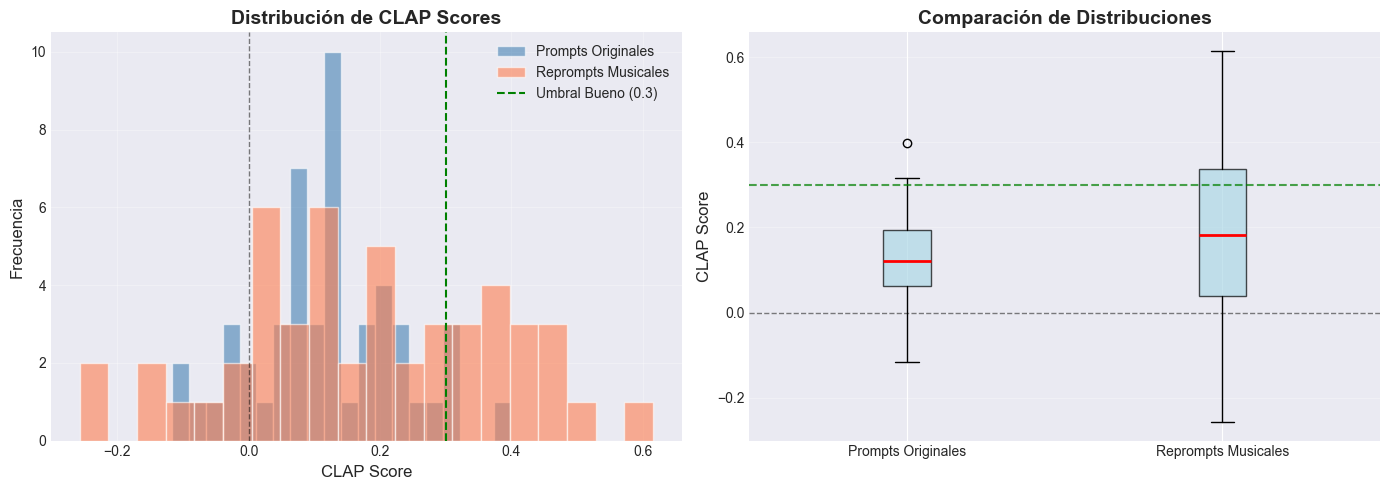

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))


axes[0].hist(prompt_df['clap_score'], bins=20, alpha=0.6, label='Prompts Originales', color='steelblue')
axes[0].hist(reprompt_df['clap_score'], bins=20, alpha=0.6, label='Reprompts Musicales', color='coral')
axes[0].axvline(0, color='black', linestyle='--', linewidth=1, alpha=0.5)
axes[0].axvline(0.3, color='green', linestyle='--', linewidth=1.5, label='Umbral Bueno (0.3)')
axes[0].set_xlabel('CLAP Score', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].set_title('Distribución de CLAP Scores', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)


data_to_plot = [prompt_df['clap_score'], reprompt_df['clap_score']]
axes[1].boxplot(data_to_plot, labels=['Prompts Originales', 'Reprompts Musicales'], patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
axes[1].axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.5)
axes[1].axhline(0.3, color='green', linestyle='--', linewidth=1.5, alpha=0.7)
axes[1].set_ylabel('CLAP Score', fontsize=12)
axes[1].set_title('Comparación de Distribuciones', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('clap_score_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

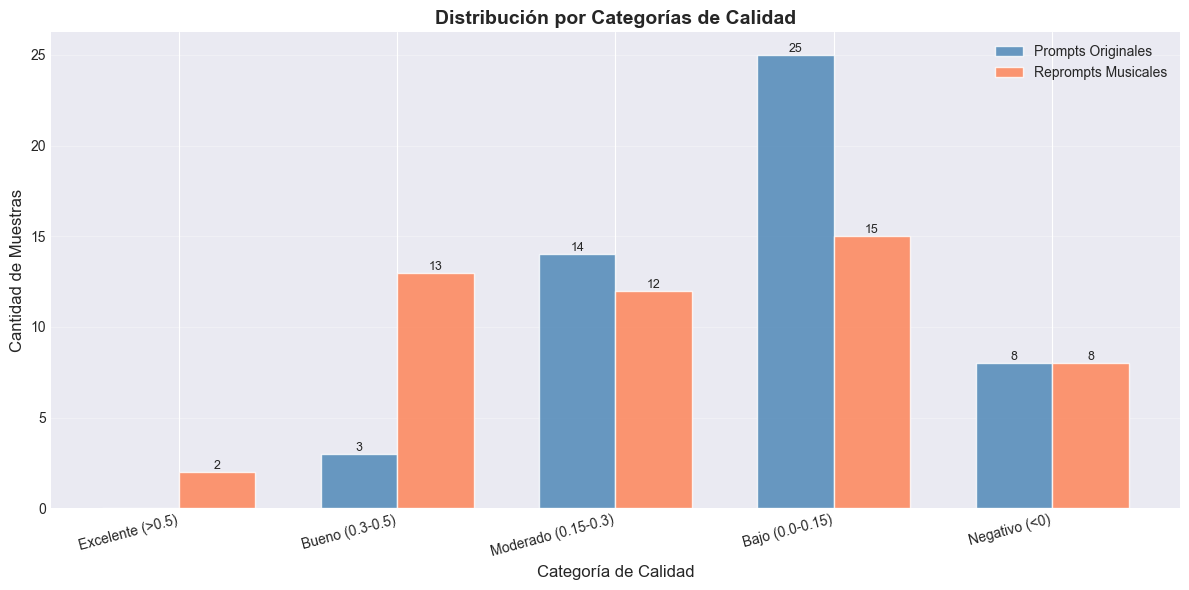

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(categories_df))
width = 0.35

bars1 = ax.bar(x - width/2, categories_df['Prompts Originales'], width, 
               label='Prompts Originales', alpha=0.8, color='steelblue')
bars2 = ax.bar(x + width/2, categories_df['Reprompts Musicales'], width, 
               label='Reprompts Musicales', alpha=0.8, color='coral')

ax.set_xlabel('Categoría de Calidad', fontsize=12)
ax.set_ylabel('Cantidad de Muestras', fontsize=12)
ax.set_title('Distribución por Categorías de Calidad', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(categories_df.index, rotation=15, ha='right')
ax.legend()
ax.grid(alpha=0.3, axis='y')


for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{int(height)}',
                   ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('clap_score_categories.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Análisis de Mejores y Peores Casos

In [16]:
print("TOP 5 MEJORES SCORES - PROMPTS ORIGINALES")
display(prompt_df.nlargest(5, 'clap_score')[['id_prompt', 'clap_score', 'text']])

TOP 5 MEJORES SCORES - PROMPTS ORIGINALES


,id_prompt,clap_score,text
36,37,0.398430,I feel relaxed and I'm gonna drink a cup of ja...
41,42,0.316683,I feel anxious and I'm gonna drink a cup of ch...
40,41,0.303298,I feel bored and I'm gonna eat a chocolate chi...
15,16,0.296307,We're at the fair and we're gonna eat a bag of...
16,17,0.280306,I'm in the garden and I'm gonna drink a glass ...


In [17]:
print("TOP 5 MEJORES SCORES - REPROMPTS MUSICALES")
display(reprompt_df.nlargest(5, 'clap_score')[['id_prompt', 'clap_score', 'text']])

TOP 5 MEJORES SCORES - REPROMPTS MUSICALES


,id_prompt,clap_score,text
9,10,0.615249,A mellow marimba leads with a sweet-sounding m...
13,14,0.526347,A mellow marimba leads with a joyful melody wh...
29,30,0.470121,"A mellow marimba leads with a sweet-sounding, ..."
33,34,0.449237,A mellow marimba melody drives the opening wit...
38,39,0.448182,"A mellow marimba leads with a bright, legato m..."


### Hallazgo 2: Sesgo Instrumental [TBD]

**Los 5 mejores resultados con reprompts musicales describen marimba**, con scores entre 0.448 y 0.615. Esto sugiere que el modelo tasty-musicgen-small tiene particular éxito generando audio que se alinea con descripciones de este instrumento de percusión melódica.

In [18]:
print("TOP 5 PEORES SCORES - PROMPTS ORIGINALES")
display(prompt_df.nsmallest(5, 'clap_score')[['id_prompt', 'clap_score', 'text']])

TOP 5 PEORES SCORES - PROMPTS ORIGINALES


,id_prompt,clap_score,text
28,29,-0.117069,We're gonna eat a tray of sushi rolls in the m...
11,12,-0.102894,I'm at the food court and I'm gonna eat a bowl...
21,22,-0.081863,I'm gonna drink a cup of chamomile tea in the ...
24,25,-0.064147,We're gonna eat a plate of chicken curry in th...
27,28,-0.038221,I'm gonna drink a ginger ale in the stadium. T...


In [19]:
print("TOP 5 PEORES SCORES - REPROMPTS MUSICALES")
display(reprompt_df.nsmallest(5, 'clap_score')[['id_prompt', 'clap_score', 'text']])

TOP 5 PEORES SCORES - REPROMPTS MUSICALES


,id_prompt,clap_score,text
10,11,-0.257557,"A bright glockenspiel leads with a sweet, joyf..."
8,9,-0.223609,"A sweet-sounding harmonium leads with warm, br..."
47,48,-0.151392,Lead with a reedy harmonium melody in the mid-...
2,3,-0.131710,"Mandolin's bright, sweet timbre articulates a ..."
25,26,-0.125652,A warm electric piano leads the melody with sm...


## 6. Comparación Par a Par (Mismo Prompt ID)

In [21]:
merged = prompt_df.merge(reprompt_df, on='id_prompt', suffixes=('_orig', '_reprompt'))
merged['improvement'] = merged['clap_score_reprompt'] - merged['clap_score_orig']
merged['improvement_pct'] = (merged['improvement'] / merged['clap_score_orig'].abs()) * 100

print(f"Total de pares analizados: {len(merged)}")
print(f"Casos donde reprompt MEJORÓ: {(merged['improvement'] > 0).sum()} ({(merged['improvement'] > 0).sum()/len(merged)*100:.1f}%)")
print(f"Casos donde reprompt EMPEORÓ: {(merged['improvement'] < 0).sum()} ({(merged['improvement'] < 0).sum()/len(merged)*100:.1f}%)")
print(f"Mejora promedio: {merged['improvement'].mean():+.3f}")
print(f"Mejora mediana: {merged['improvement'].median():+.3f}")
print(f"Desviación estándar de mejoras: {merged['improvement'].std():.3f}")

Total de pares analizados: 50
Casos donde reprompt MEJORÓ: 30 (60.0%)
Casos donde reprompt EMPEORÓ: 20 (40.0%)
Mejora promedio: +0.060
Mejora mediana: +0.062
Desviación estándar de mejoras: 0.236


In [22]:
print("TOP 5 MAYORES MEJORAS (Reprompt vs Original)")
top_improvements = merged.nlargest(5, 'improvement')[[
    'id_prompt', 'clap_score_orig', 'clap_score_reprompt', 'improvement', 'improvement_pct', 'text_orig'
]]
display(top_improvements)

TOP 5 MAYORES MEJORAS (Reprompt vs Original)


,id_prompt,clap_score_orig,clap_score_reprompt,improvement,improvement_pct,text_orig
13,14,-0.025266,0.526347,0.551612,2183.257872,We're at the farmers market and we're gonna ea...
9,10,0.074484,0.615249,0.540764,726.012181,I'm at the bakery and I'm gonna eat a chocolat...
21,22,-0.081863,0.430991,0.512854,626.479109,I'm gonna drink a cup of chamomile tea in the ...
29,30,0.040642,0.470121,0.429478,1056.724006,I'm gonna drink a bottle of coconut water in t...
4,5,-0.005556,0.392140,0.397696,7157.849916,We're at the stadium and we're gonna eat a chi...


### Hallazgo 3: Transformaciones Significativas

El reprompt musical puede transformar completamente resultados fallidos:
- **Caso ID 14**: Score pasa de -0.025 a 0.526 (+2183% de mejora)
- **Caso ID 10**: Score pasa de 0.074 a 0.615 (+726% de mejora)

Estos casos demuestran el potencial del reprompting cuando el modelo logra interpretar correctamente las descripciones musicales detalladas.

In [23]:
print("TOP 5 PEORES CAMBIOS (Reprompt peor que Original)")
worst_changes = merged.nsmallest(5, 'improvement')[[
    'id_prompt', 'clap_score_orig', 'clap_score_reprompt', 'improvement', 'improvement_pct', 'text_orig'
]]
display(worst_changes)

TOP 5 PEORES CAMBIOS (Reprompt peor que Original)


,id_prompt,clap_score_orig,clap_score_reprompt,improvement,improvement_pct,text_orig
10,11,0.204907,-0.257557,-0.462464,-225.694150,We're on the rooftop terrace and we're gonna d...
47,48,0.257814,-0.151392,-0.409206,-158.721389,I feel curious and I'm gonna drink a turmeric ...
8,9,0.156999,-0.223609,-0.380608,-242.427457,I'm in the gym and I'm gonna drink a vanilla p...
17,18,0.214594,-0.017294,-0.231888,-108.058956,I'm gonna drink a flat white in the cafe. The ...
2,3,0.093535,-0.131710,-0.225245,-240.813671,We're at the beach and we're gonna eat two fis...


### Hallazgo 4: Alta Varianza y Casos de Fallo

El reprompt musical introduce **alta varianza**:
- 40% de los casos empeoran con reprompt
- Algunos casos experimentan degradaciones significativas en la calidad.
- Instrumentos como glockenspiel y harmonium son particularmente problemáticos

Esto sugiere que descripciones muy técnicas o ciertos timbres están fuera del dominio efectivo del modelo.

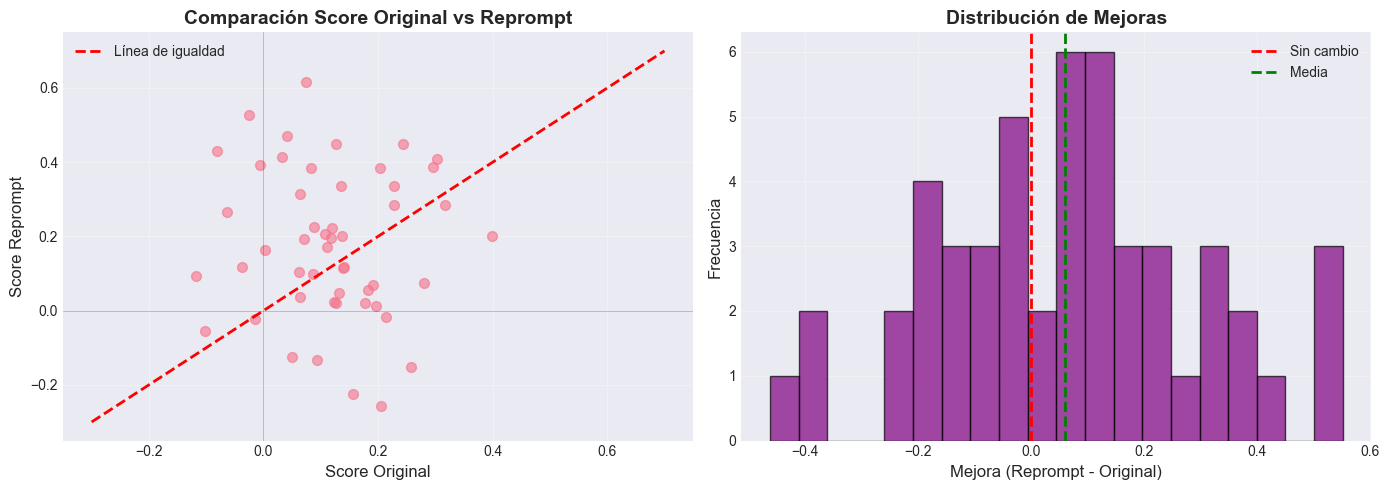

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(merged['clap_score_orig'], merged['clap_score_reprompt'], alpha=0.6, s=50)
axes[0].plot([-0.3, 0.7], [-0.3, 0.7], 'r--', linewidth=2, label='Línea de igualdad')
axes[0].axhline(0, color='black', linestyle='-', linewidth=0.5, alpha=0.3)
axes[0].axvline(0, color='black', linestyle='-', linewidth=0.5, alpha=0.3)
axes[0].set_xlabel('Score Original', fontsize=12)
axes[0].set_ylabel('Score Reprompt', fontsize=12)
axes[0].set_title('Comparación Score Original vs Reprompt', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)


axes[1].hist(merged['improvement'], bins=20, alpha=0.7, color='purple', edgecolor='black')
axes[1].axvline(0, color='red', linestyle='--', linewidth=2, label='Sin cambio')
axes[1].axvline(merged['improvement'].mean(), color='green', linestyle='--', linewidth=2, label='Media')
axes[1].set_xlabel('Mejora (Reprompt - Original)', fontsize=12)
axes[1].set_ylabel('Frecuencia', fontsize=12)
axes[1].set_title('Distribución de Mejoras', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('clap_score_improvements.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Resumen de Hallazgos Principales

### Hallazgos Clave del Análisis

1. **Mejora Promedio del Reprompt: +50%**
   - El reprompt musical aumenta el CLAP Score promedio de 0.119 a 0.179
   - La mediana mejora en 50.4% (de 0.121 a 0.182)

2. **Multiplicación de Resultados de Calidad**
   - Resultados buenos/excelentes: 6% → 30% (4.3x aumento)
   - 2 casos alcanzan scores excelentes (>0.5) con reprompt vs. 0 con prompts originales

3. **Efectividad Inconsistente**
   - 60% de casos mejoran con reprompt
   - 40% empeoran, algunos de forma significativa
   - Alta desviación estándar (±0.236) indica resultados impredecibles

4. **Trade-off Complejidad vs. Consistencia**
   - Prompts simples: scores modestos pero consistentes (0.10-0.20)
   - Reprompts técnicos detallados: alto potencial (0.6+) pero alto riesgo (-0.25)

### 💡 Recomendaciones

**Para maximizar CLAP Score:**
- Usar descripciones de marimba o instrumentos de percusión melódica
- Evitar glockenspiel, harmonium, o timbres muy específicos
- Mantener descripciones moderadamente detalladas, no extremadamente técnicas

**Para maximizar consistencia:**
- Preferir prompts más simples si se requiere predictibilidad
- Usar reprompts musicales cuando se acepta alta varianza a cambio de potencial excelencia

**Evaluación del modelo tasty-musicgen-small:**
- Scores absolutos (0.12-0.18 promedio) son modestos pero razonables para un modelo small
- El 30% de resultados buenos/excelentes con reprompt es prometedor
- La inconsistencia (40% empeoran) sugiere que el fine-tuning requiere refinamiento
- Los prompts cross-modales (mapeo sabores/texturas → música) son experimentales y desafiantes

---

## Conclusiones Finales

Este análisis revela que **tasty-musicgen-small** tiene capacidad funcional pero limitada para seguir prompts textuales según la métrica CLAP Score. El reprompting musical es una estrategia efectiva que mejora significativamente el score promedio (+50%) y logra casos de excelencia (>0.6), pero introduce alta variabilidad.

El modelo muestra sesgos que deben considerarse al diseñar prompts. Los scores absolutos (0.12-0.18 promedio) son modestos pero aceptables considerando:
1. El tamaño del modelo (small)
2. La naturaleza experimental de los prompts cross-modales (sabores/texturas → música)
3. El dominio especializado del fine-tuning

Para aplicaciones prácticas, se recomienda un enfoque híbrido: usar reprompts musicales cuando se busca maximizar calidad y se acepta variabilidad, y prompts simples cuando se requiere consistencia.